In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import random
from numba import njit, prange, cuda
import math

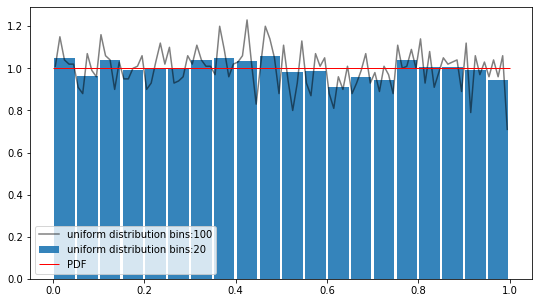

In [2]:
@njit
def uniform_samples(n=10000):
    samples=[]
    for i in range (0, n):
        samples.append(random.random())
    return samples;

u_samples = uniform_samples()

plt.figure(figsize=(9, 5))

plt.hlines(y=1, xmin=0, xmax=1, colors='r',zorder=3, lw=1, label="PDF") # f(x)=1/a+b
plt.hist(u_samples,alpha=.9, rwidth=0.9, bins=20, density=True, label="uniform distribution bins:20")

histogram, bins = np.histogram(u_samples,bins=100,density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.plot(bin_centers, histogram, color='black',alpha=.5, label="uniform distribution bins:100")


plt.legend()
plt.show()

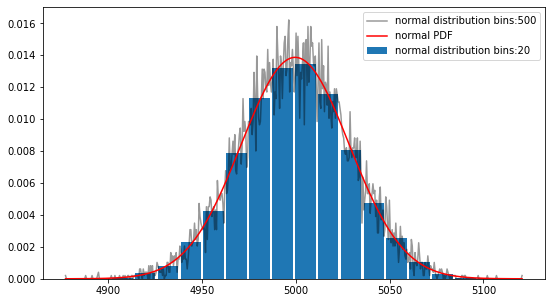

In [15]:
@njit
def u_samples_sum(n=10000):
    total=0
    for i in range (0, n):
        total+=random.random()
    return total;

@njit
def get_normal_samples(n=10000):
    samples=[]
    total=0
    for i in range (0, n):
        uniform_sample_total = u_samples_sum()
        samples.append(uniform_sample_total)
        total+=uniform_sample_total
    return samples,total;

def get_mu_std(normal_samples,total,n):
    mu = total/n
    std =math.sqrt(1/n * sum(pow(x-mu,2) for x in normal_samples))
    return mu,std;

#mu: mean, std: standard di
def get_normal_pdf(mu,std):
    pi = math.pi
    e = math.e
    sqrt = math.sqrt
    return lambda x:(1/(std*sqrt(2*pi))) * pow(e,(-1/2)*(pow((x-mu)/std,2)));

n = 10000

normal_samples,total = get_normal_samples(n)

mu,std = get_mu_std(normal_samples,total,n)

pdf = get_normal_pdf(mu,std)

plt.figure(figsize=(9, 5))

plt.hist(normal_samples,rwidth=0.9, bins=20,density=True, label="normal distribution bins:20")

histogram, bins = np.histogram(normal_samples,bins=500,density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.plot(bin_centers, histogram,color='black',alpha=.4, label="normal distribution bins:500")

pdf_normal_samples=[pdf(x) for x in bin_centers]

plt.plot(bin_centers, pdf_normal_samples,color='red',alpha=1, label="normal PDF")


plt.legend()
plt.show()